# CA1 Machine Learning

# Libraries

In [29]:
import cufflinks as cf

from IPython.display import display,HTML

%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

cf.set_config_file(sharing='public',theme='white',offline=True) # write cf.getThemes() to find all themes available
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

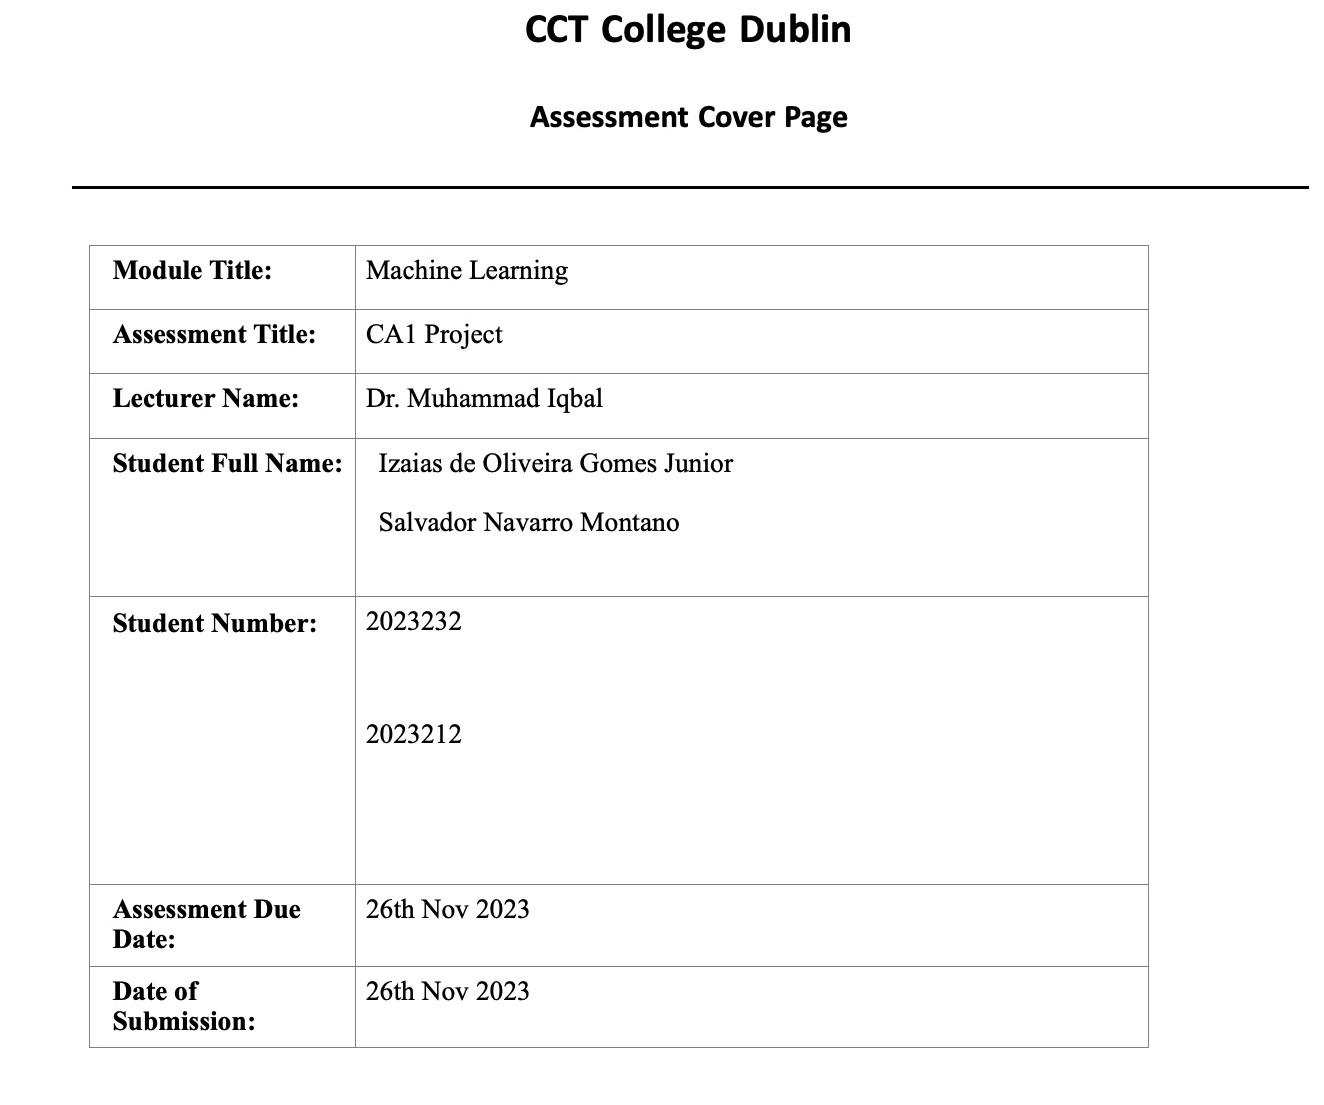

In [30]:
image_path = "ca1ml.jpg"

Image(filename = image_path)

In [2]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_excel("Seoul_Bike.xlsx") 

DOI
10.24432/C5F62R
License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

    @misc{misc_seoul_bike_sharing_demand_560,
  title        = {{Seoul Bike Sharing Demand}},
  year         = {2020},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5F62R}
}

In [4]:
df.shape 

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

If we open the file as csv we cannot see the variable date as a datetime64[ns] Dtype. This will help to group by month for a better visualisation. The Machine Learning Algorithms will be use the original dataset by hour. The categorical data will be transformed in numeric.

In [6]:
df.rename(columns={'Temperature(°C)': 'Temperature'}, inplace=True) 

It will be easier to deal with this variable withou the (°C).

In [7]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


In [8]:
df["Month"] = df["Date"].dt.month
df["Month"]=df["Month"].map({1:"Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
df.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec


In [9]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [10]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [11]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df['Holiday'] = df['Holiday'].replace({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].replace({'Yes': 0, 'No': 1})
df['Seasons'] = df['Seasons'].replace({'Winter': 0, 'Spring': 1, 'Summer':2, 'Autumn':3})
df.drop(["Date"], inplace = True, axis = 1)
df.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,Dec
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,Dec
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,Dec
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,Dec
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,Dec


# Graphics 

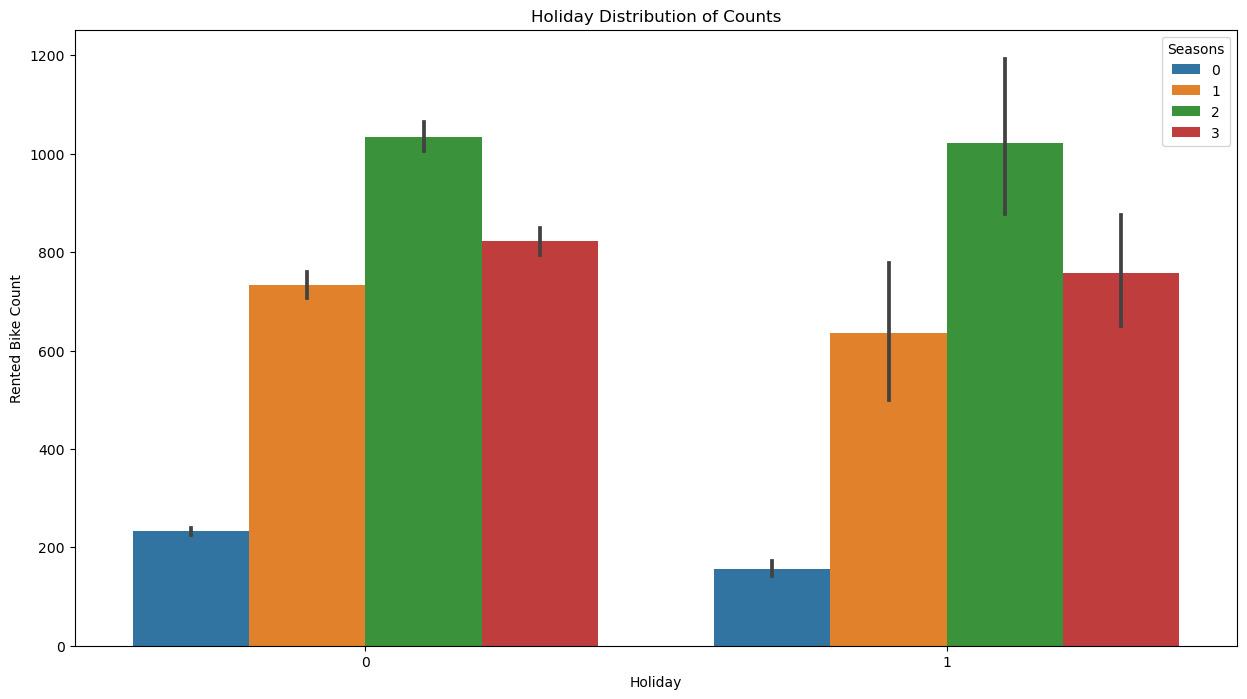

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='Holiday',y='Rented Bike Count',hue='Seasons')
ax.set_title('Holiday Distribution of Counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is higher compared to during holiday for different seasons.

0: No holiday, 1 : holiday

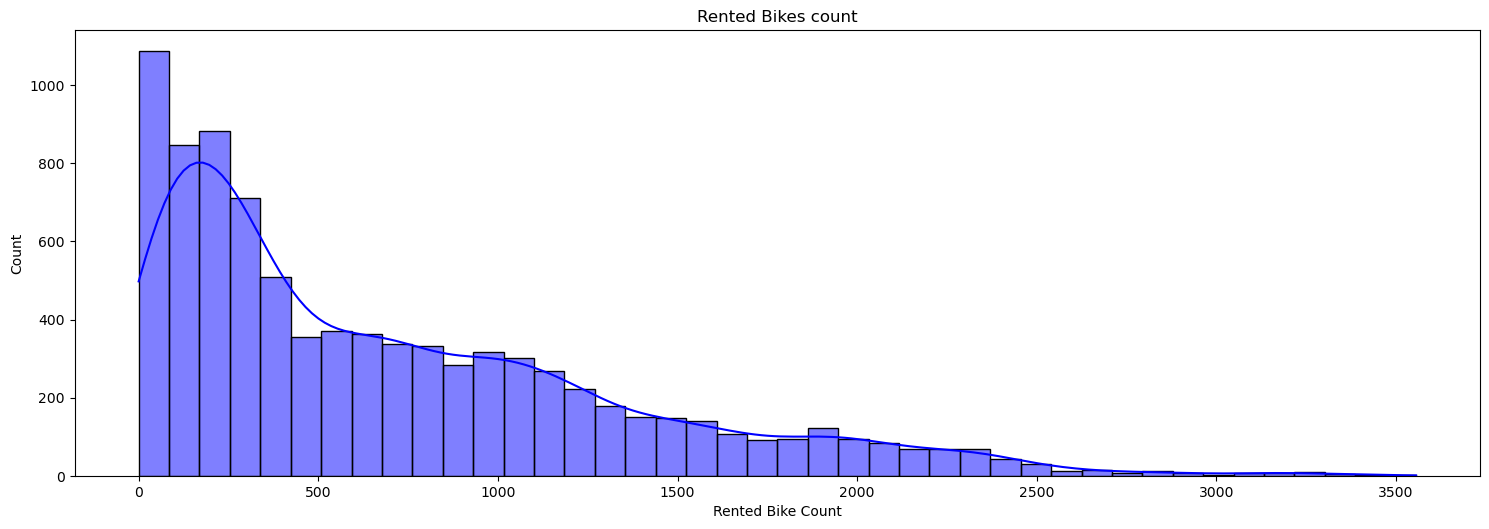

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.histplot(df['Rented Bike Count'], kde=True, color='blue')
plt.title('Rented Bikes count')
plt.tight_layout()
plt.show()

The distribution of the target variable is skewed. 

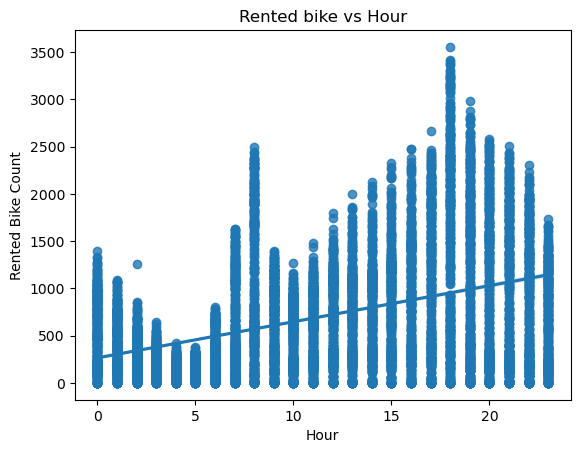

In [15]:
sns.regplot(x='Hour', y='Rented Bike Count', data=df)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Rented bike vs Hour')
plt.show()

The number of rented bikes is higher during the evening and night time with a peak in morning around 7 and 8.

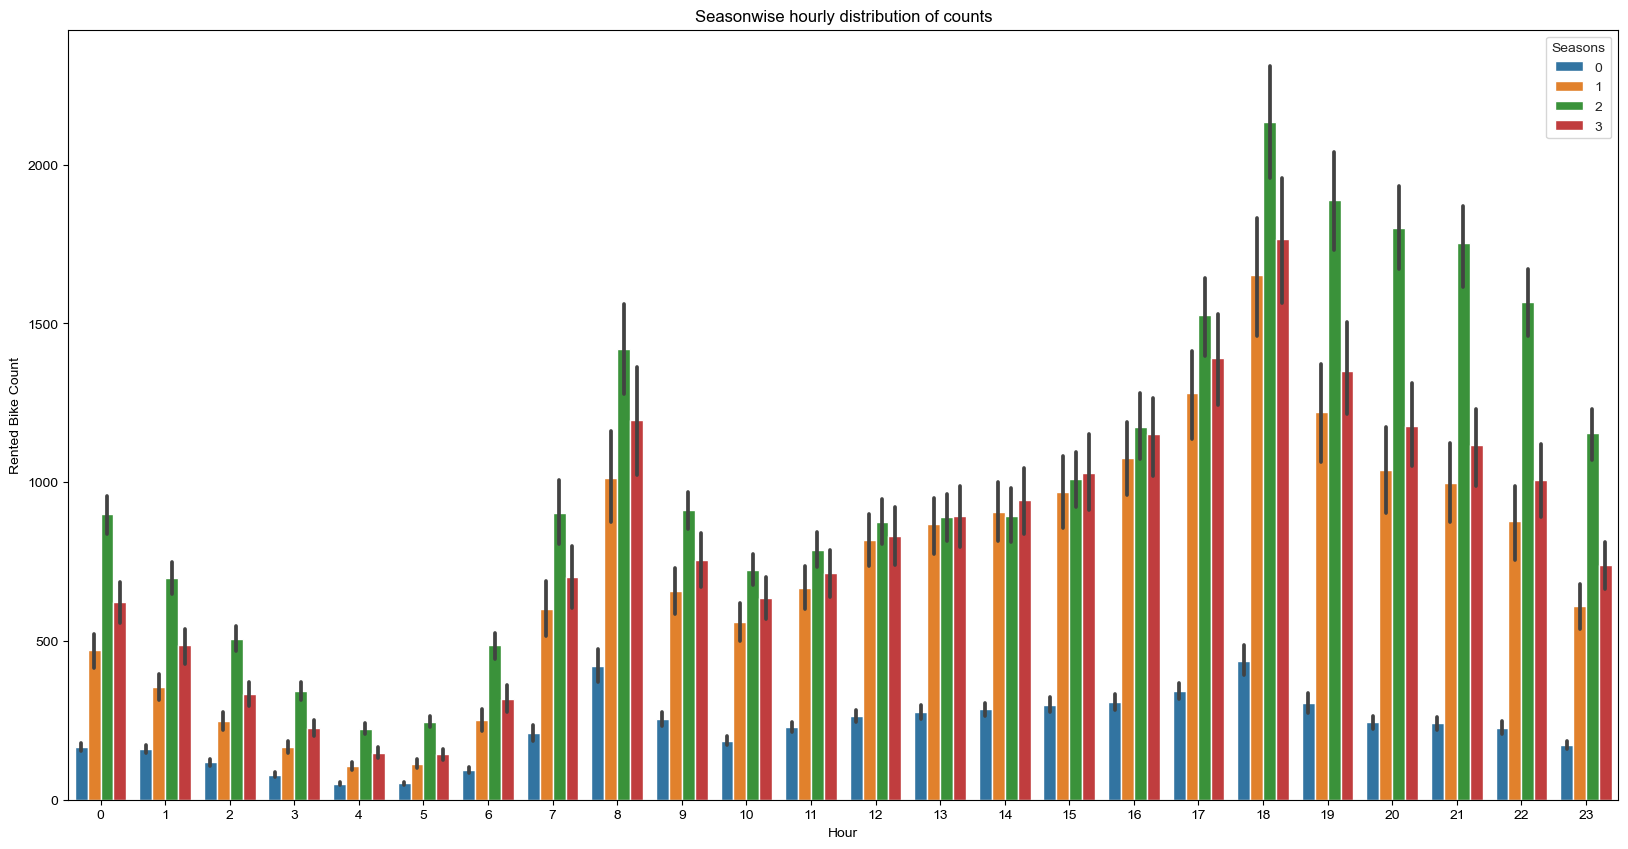

In [16]:
fig,ax=plt.subplots(figsize=(20,10))
sns.set_style('white')
#Bar plot
sns.barplot(x='Hour',y='Rented Bike Count',data=df[['Hour','Rented Bike Count','Seasons']],hue='Seasons',ax=ax)
ax.set_title('Seasonwise hourly distribution of counts')
plt.show()

Winter:0 ; 
Spring:1 ; 
Summer:2 ;
Autumn:3 ;

The number of rented bikes is lower when the temperature is also lower as we can see that during the winter the difference is significant. For example: the busiest hour across the seasons is at 6pm (18h) and the number of rented bikes in the Summer is more than 2000 and in the Winter is almost 500.

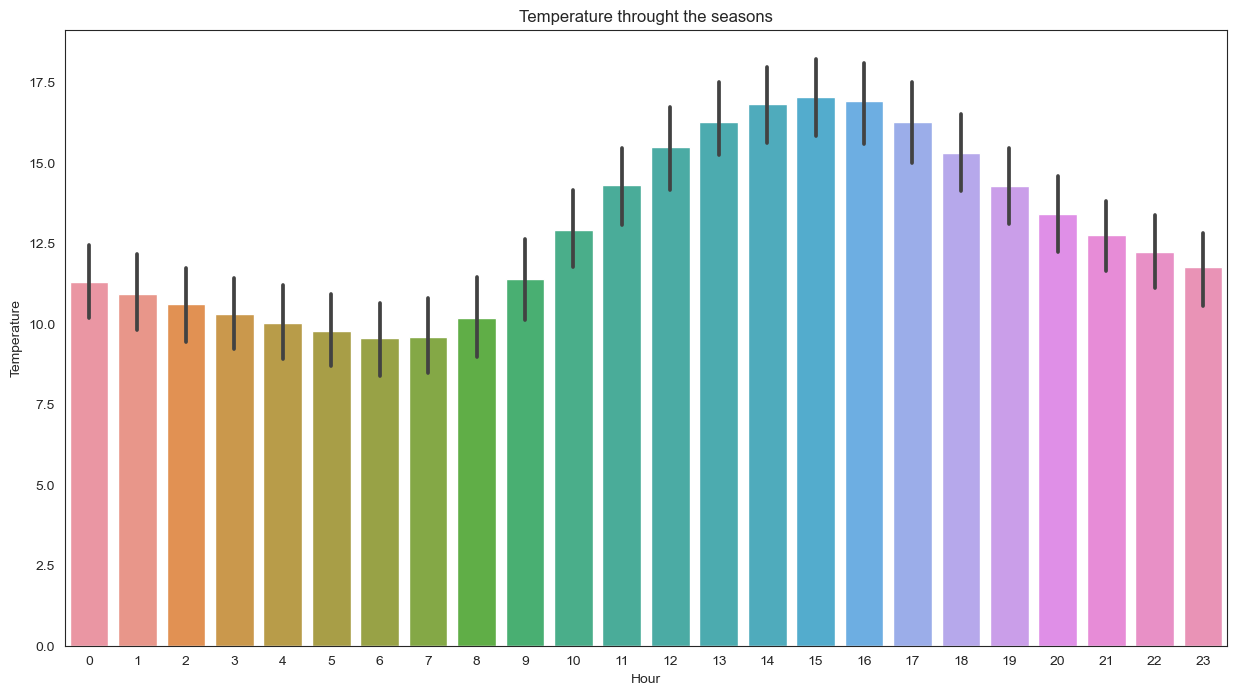

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(x='Hour', y='Temperature', data=df[['Hour','Temperature']],ax=ax1)
ax1.set_title('Temperature throught the seasons')
plt.show()

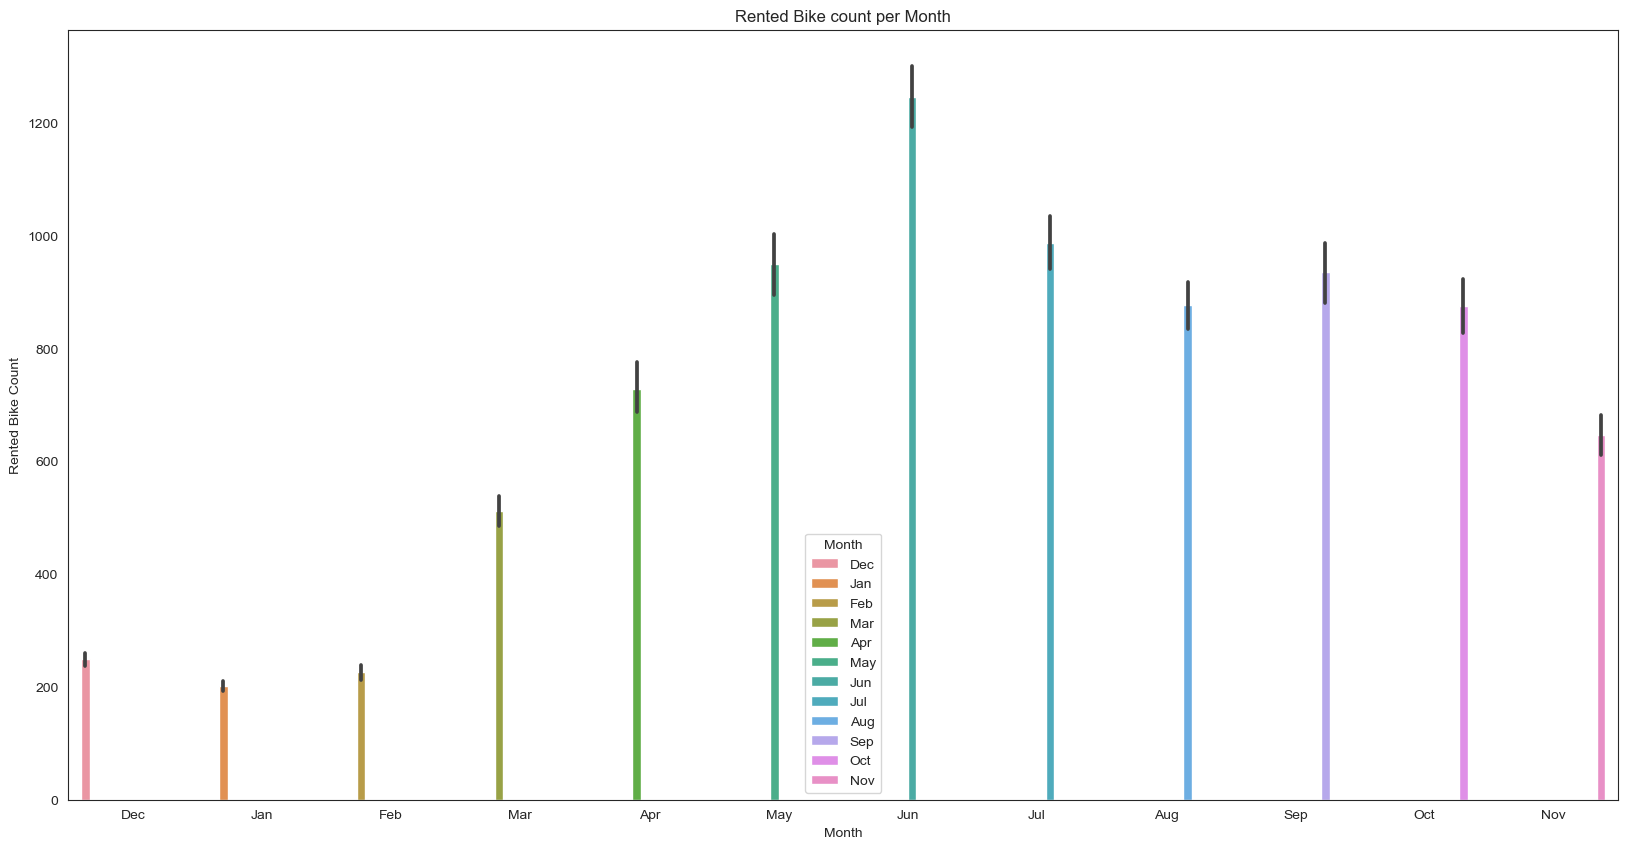

In [20]:
fig,ax=plt.subplots(figsize=(20,10))
sns.set_style('white')
#Bar plot
sns.barplot(x="Month", y='Rented Bike Count',data=df[['Rented Bike Count','Month']],hue = "Month", ax=ax)
ax.set_title("Rented Bike count per Month")
plt.show()

The peak of rented bike is during the Summer

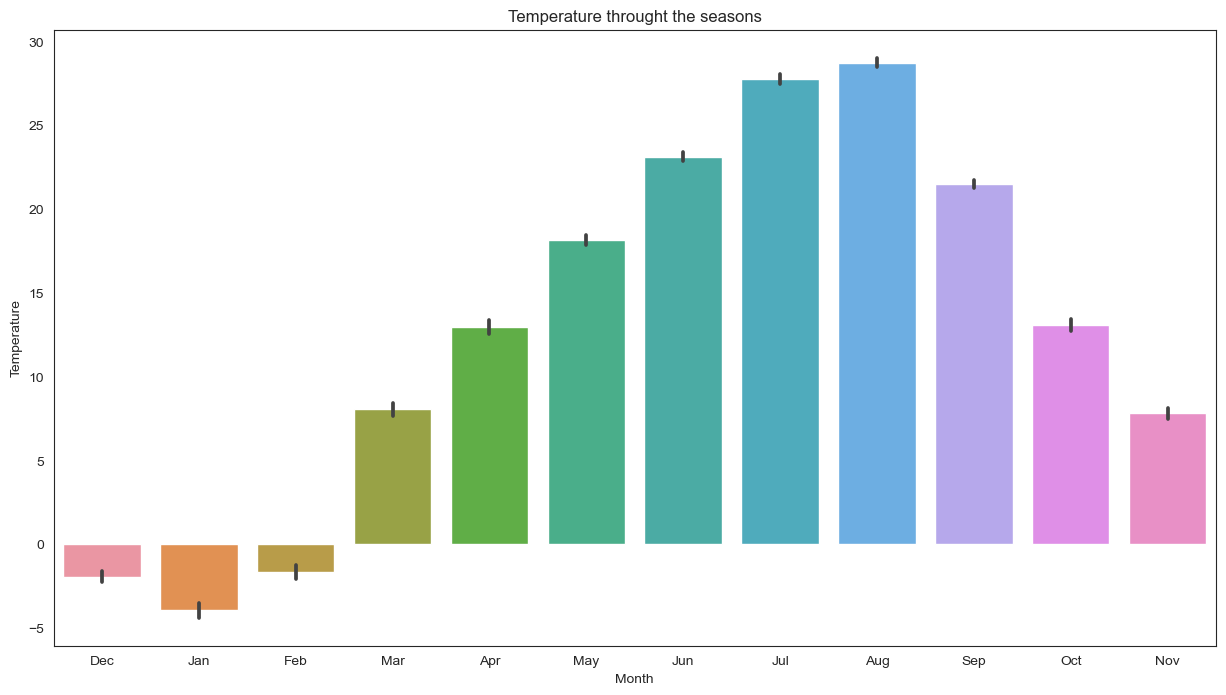

In [23]:
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.barplot(x='Month', y='Temperature', data=df[['Month','Temperature']],ax=ax1)
ax1.set_title('Temperature throught the seasons')
plt.show()

The temperature is higher in July and August but the peak of rented bike is in June. Higher and lower temperatures can impact on the number of bikes rented.

In [24]:
df2 = df.pivot_table(index="Hour", columns="Month", values="Rented Bike Count", aggfunc='sum')

pd.set_option('display.max_rows', None)
df2

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Hour,,,,,,,,,,,,
0,14229,25708,6286,4113,4467,27331,29675,9157,19912,14285,19568,22902
1,10391,19833,6105,3932,4278,21465,22989,7550,14814,11624,14804,17772
2,7121,13912,4650,2799,3152,15605,17012,5352,10294,7978,10376,11844
3,4652,9571,3113,1877,2013,10884,11071,3433,7078,5453,7118,7953
4,2962,6249,1913,1286,1344,7121,7221,2277,4501,3576,4669,5277
5,3254,6788,1854,1250,1506,8104,7734,2283,4919,3493,4628,4952
6,7634,13843,2944,2635,2775,15568,15286,4896,10621,7731,10433,10595
7,18674,24119,6738,6085,6038,27995,30942,13070,23632,18575,23551,21773
8,32099,38885,13734,11946,12318,43419,48207,23232,37943,34832,39757,34359


In [25]:
df2.iplot(kind="line")

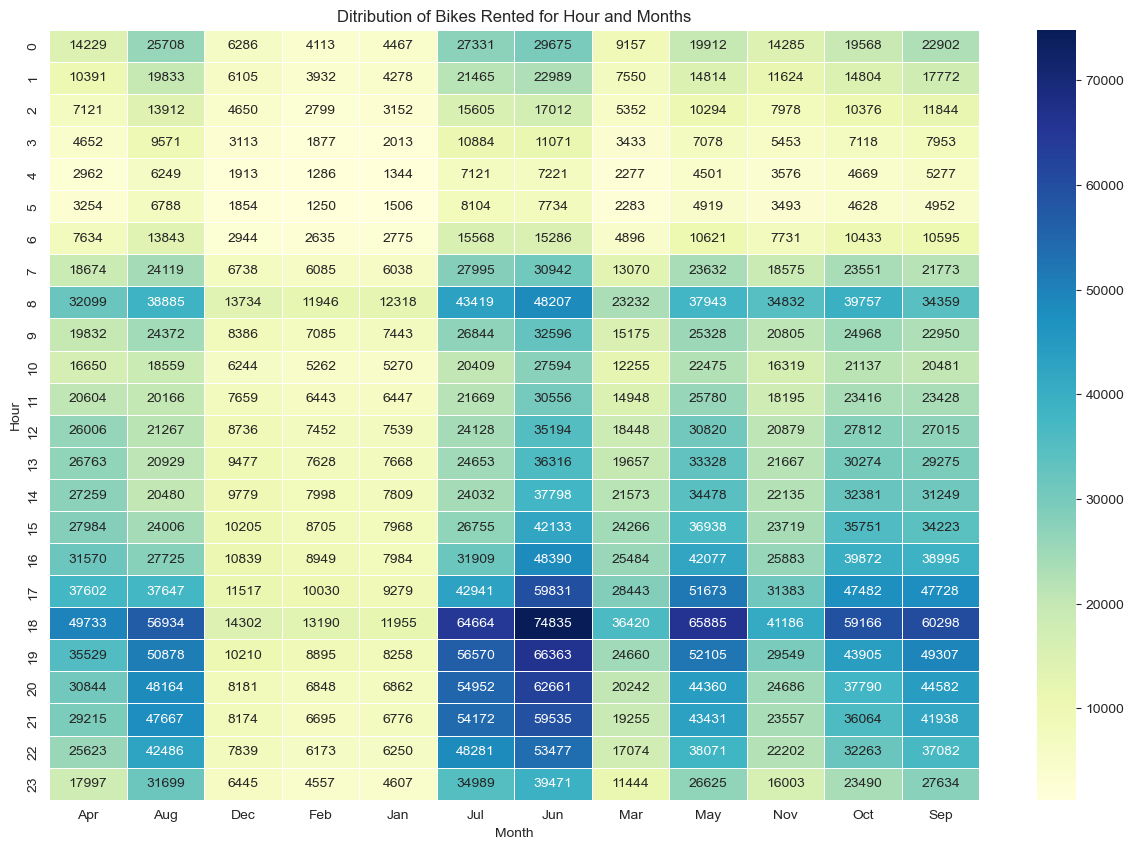

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df2, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title("Ditribution of Bikes Rented for Hour and Months")
plt.xlabel("Month")
plt.ylabel("Hour")
plt.show()

8 am and 6pm (18h) are the busiest hours for all months but mostly during the warmer seasons.

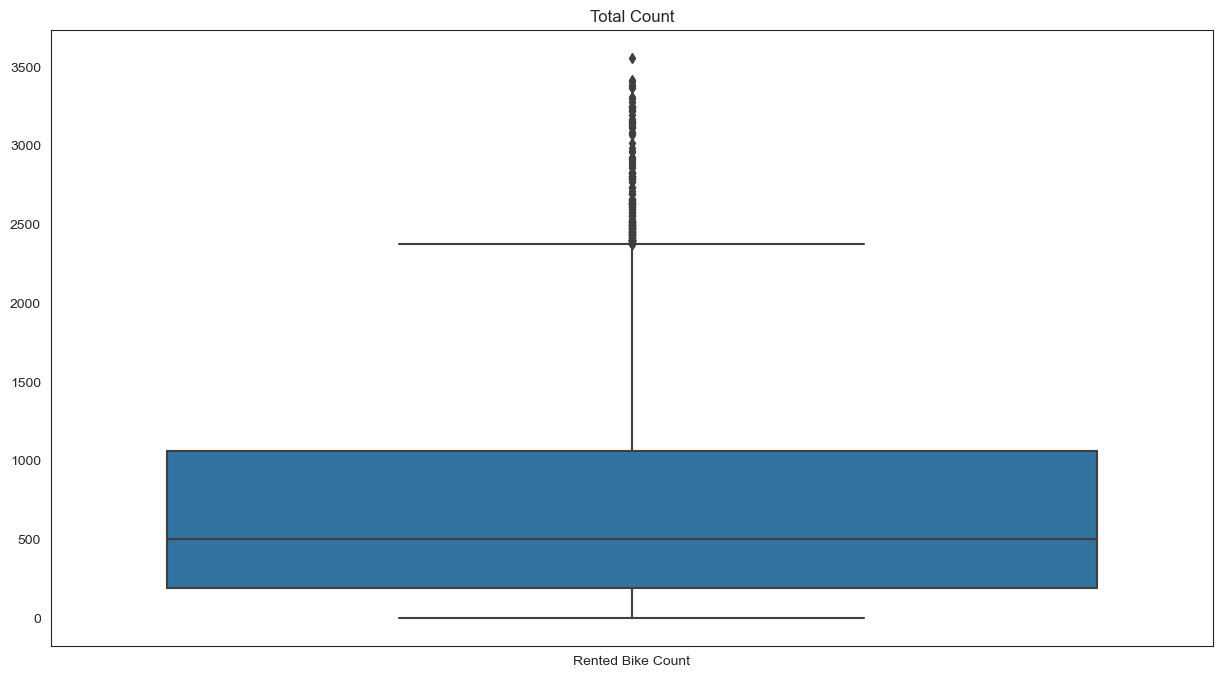

In [28]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['Rented Bike Count']])
ax.set_title('Total Count')
plt.show()

As we saw above the targe variable is skewed with a high presence of outliers due the peak hour (18h).

# Machine Learning Models

In [ ]:
bike = pd.read_csv("Seoul_Bike.csv")

In [ ]:
bike['Seasons'].replace('Winter', 0, inplace = True)
bike['Seasons'].replace('Spring', 1, inplace = True)
bike['Seasons'].replace('Summer', 2, inplace = True)
bike['Seasons'].replace('Autumn', 3, inplace = True)

In [ ]:
bike["Holiday"].replace('No Holiday', 0, inplace = True)
bike["Holiday"].replace('Holiday', 1, inplace = True)

In [ ]:
bike["Functioning Day"].replace('No', 0, inplace = True)
bike["Functioning Day"].replace('Yes', 1, inplace = True)

In [ ]:
bike_d = bike.drop(["Date"], axis = 1)

In [ ]:
bike_d.head(2)

In [ ]:
bike_array = bike_d.values

In [ ]:
X = bike_array[:, 1:]

y = bike_array[:, 0]

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [ ]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

X_scaled = scaler.transform(X)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, y_train)

yp_lr = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lr)
mse_r = mean_squared_error(y_test, yp_lr, squared = False)
r2 = r2_score(y_test, yp_lr)

n = len(y_test)
k = X_train_scaled.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

In [ ]:
train_pred = linear_reg.predict(X_train_scaled)
test_pred = linear_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_lr, delta=1.0):
    error = y_test - yp_lr
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_lr, delta=1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

In [ ]:
score_l = cross_val_score(LinearRegression(), X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_l

## Polynomial 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p2 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p2)
mse_r = mean_squared_error(y_test, yp_p2, squared = False)
r2 = r2_score(y_test, yp_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

In [ ]:
train_pred = poly_reg.predict(X_train_poly)
test_pred = poly_reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

In [ ]:
import tensorflow as tf
def huber_loss(y_test, yp_p2, delta=1.0):
    error = y_test - yp_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_p2, delta=1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

In [ ]:
score_p2 = cross_val_score(PolynomialFeatures(degree = 2), X_test_poly, y_test, cv = 10, scoring = 'r2').mean()
score_p2

# Artificial Neural Network

In [ ]:
 !pip install tensorflow
 !pip install keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 300, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

In [ ]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 350, batch_size = 80, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

We tried to use a code to get the best parameters but we encountered an error and we could not solve it. So after a fill manual tunning (see results below) we decided to keep the two tests above: the first one with 300 epochs and units from 64 to 1 (better result) and the second one with 350 epochs and units from 80 to 1 (higher R2 but a little bit overfitting)

## 80 64 

## 200 epochs
Mean Squared Error: 60656.38098330473
Root Mean Squared Error: 246.28516192272878
R-squared: 0.8499137853925207
Adjusted R-squared: 0.8488781128362874
219/219 [==============================] - 0s 234us/step
55/55 [==============================] - 0s 240us/step
Training MSE: 58582.505995858664
Validation MSE: 60656.38098330473
Mean Huber Loss: 659.6767507504989

## 300 epochs
Mean Squared Error: 57705.313914379854
Root Mean Squared Error: 240.21930379213876
R-squared: 0.8572158116302817
Adjusted R-squared: 0.856230526834171
219/219 [==============================] - 0s 240us/step
55/55 [==============================] - 0s 252us/step
Training MSE: 53977.55473223913
Validation MSE: 57705.313914379854
Mean Huber Loss: 664.794071903621

## 200 epochs

Mean Squared Error: 74403.76144386557
Root Mean Squared Error: 272.77052891371085
R-squared: 0.8158977056224086
Adjusted R-squared: 0.8146273045111199
219/219 [==============================] - 0s 222us/step
55/55 [==============================] - 0s 230us/step
Training MSE: 78365.65840068748
Validation MSE: 74403.76144386557
Mean Huber Loss: 669.5942908107245

## 400 epochs
Mean Squared Error: 104880.8031872959
Root Mean Squared Error: 323.8530580175149
R-squared: 0.7404862855285423
Adjusted R-squared: 0.738695506590269
219/219 [==============================] - 0s 243us/step
55/55 [==============================] - 0s 237us/step
Training MSE: 108801.48485415935
Validation MSE: 104880.8031872959
Mean Huber Loss: 636.4121079573872

# Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.1, 0.5, 1, 2],
              'degree': [2, 3, 4]}

random_search = RandomizedSearchCV(svm.SVR(), param_dist, cv=5)
random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
best_regressor = random_search.best_estimator_

yp_best = best_regressor.predict(X_test_scaled)

best_params

In [ ]:
regressor = svm.SVR(kernel = 'rbf', C = 100, epsilon = 2.0, degree = 3)

regressor.fit(X_train_scaled, y_train)

yp_svm_p2 = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

In [ ]:
score_svr = cross_val_score(svm.SVR(kernel = 'rbf', C = 100, epsilon = 2.0, degree = 3), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svr

In [ ]:
train_pred = regressor.predict(X_train_scaled)
test_pred = regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 10, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train, y_train)

best_k

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors = 5, metric = 'manhattan') 

knn_regressor.fit(X_train_scaled, y_train)

yp_knn = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

In [ ]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 5, metric='manhattan'), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn

In [ ]:
train_pred = knn_regressor.predict(X_train_scaled)
test_pred = knn_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

# Summary

On average the models performed better when the dataset is split at 20% with higher R2, smaller difference between the Training and Validation MSE (no overfitting) and a lower Huber Loss.

Three other experiments were performed on the pursuit of the best model, the results can be found in separated Jupyter Notebooks or in Izaias's Github account:


- Testing more models with all the variables: this was the first experiment when the idea was to test the maximum number of models to find the best ones, that are presented in this current file. Note that KNN did not perform well as so many others, but we chose to add here to demonstrate that some models had good R2 but were overfitting. 
http://localhost:8889/notebooks/Documents/GitHub/ML/nopca.ipynb#KNN

- Applying PCA: all models performed bad when the PCA was applied, a different approach like PCR would be better for a regression problem (Pedregosa et al., 2011), unfortunately we did not have time to test the second technique. 
http://localhost:8889/notebooks/Documents/GitHub/ML/PCA.ipynb

- Less variables: we tried to apply the ML only with one independent variable, the one with the highest correlation with the target variable. The idea was to avoid the presence of multicollinearity and simplify the model. Unfortunately the R2 for all models were worse and most of the models were overfitted. 
http://localhost:8889/notebooks/Documents/GitHub/ML/2%20VARIABLES.ipynb

Github Repository: https://github.com/izazaka/ML

# Linear Regression 20%
Mean Squared Error: 185842.69668292036
Root Mean Squared Error: 431.09476531607334
R-squared: 0.5401567583588167
Adjusted R-squared: 0.536983602004766

Training MSE: 190458.54514326117
Validation MSE: 185842.69668292036
Mean Huber Loss: 316.29980294918016

Cross-Validation: 0.5341206624410259

# Linear Regression 10%
Mean Squared Error: 186610.79228381193
Root Mean Squared Error: 431.98471302097244
R-squared: 0.5347049423977273
Adjusted R-squared: 0.5282350227091672

Training MSE: 189792.53252521323
Validation MSE: 186610.79228381193
Mean Huber Loss: 318.1292093386071

Cross-Validation: 0.5174216088198078

# Linear Regression 30%
Mean Squared Error: 195025.4952516888
Root Mean Squared Error: 441.6169100608454
R-squared: 0.5369360619674715
Adjusted R-squared: 0.5348111031696166

Training MSE: 187264.33538299127
Validation MSE: 195025.4952516888
Mean Huber Loss: 326.980255571286

Cross-Validation: 0.5325208313082583

# Polynomial 2 20%

Mean Squared Error: 132761.75680633067
Root Mean Squared Error: 364.3648676894229
R-squared: 0.6714985430933418
Adjusted R-squared: 0.669231713028431

Training MSE: 136036.4079873431
Validation MSE: 132761.75680633067
Mean Huber Loss: 259.98146558658806

Cross-Validation: nan

# Polynomial 2 10%

Mean Squared Error: 129787.7459520186
Root Mean Squared Error: 360.2606638977098
R-squared: 0.6763874372444199
Adjusted R-squared: 0.6718876101840874

Training MSE: 135728.0226203764
Validation MSE: 129787.7459520186
Mean Huber Loss: 257.9908250948034

Cross-Validation: nan

# Polynomial 2 30%

Mean Squared Error: 143033.25052369505
Root Mean Squared Error: 378.1973698000755
R-squared: 0.6603852220879212
Adjusted R-squared: 0.6588267603919575

Training MSE: 134460.97390464265
Validation MSE: 143033.25052369505
Mean Huber Loss: 267.12350803325194

Cross-Validation: nan

# ANN 20%

## 300 epochs, batch_size = 64, units from 64 to 1
Mean Squared Error: 72065.56436292425
Root Mean Squared Error: 268.45030147668723
R-squared: 0.8216832659080004
Adjusted R-squared: 0.8204527881569343

Training MSE: 72580.07929271933
Validation MSE: 72065.56436292425
Mean Huber Loss: 637.7659402750329

## 350 epochs, batch_size = 80, units from 80 to 1
Mean Squared Error: 60959.661632957526
Root Mean Squared Error: 246.9001045624678
R-squared: 0.8491633574254678
Adjusted R-squared: 0.8481225065278861

Training MSE: 58179.37027287792
Validation MSE: 60959.661632957526
Mean Huber Loss: 661.3707187387948

# ANN 10%

## 300 epochs, batch_size = 64, units from 64 to 1
Mean Squared Error: 81181.98082686406
Root Mean Squared Error: 284.9245177706967
R-squared: 0.7975809759831394
Adjusted R-squared: 0.7947663429724762

Training MSE: 84108.78480963327
Validation MSE: 81181.98082686406
Mean Huber Loss: 636.3461260239243

## 350 epochs, batch_size = 80, units from 80 to 1
Mean Squared Error: 57666.51615700094
Root Mean Squared Error: 240.1385353436656
R-squared: 0.8562143988104072
Adjusted R-squared: 0.8542150625250362

Training MSE: 56260.203266645854
Validation MSE: 57666.51615700094
Mean Huber Loss: 645.5744498701923

# ANN 30%

## 300 epochs, batch_size = 64, units from 64 to 1
Mean Squared Error: 69443.73445949942
Root Mean Squared Error: 263.5217912422034
R-squared: 0.83511443409488
Adjusted R-squared: 0.8343577890505735

Training MSE: 63192.78008888488
Validation MSE: 69443.73445949942
Mean Huber Loss: 686.8274866689037

## 350 epochs, batch_size = 80, units from 80 to 1
Mean Squared Error: 73340.19319884239
Root Mean Squared Error: 270.8139457244445
R-squared: 0.8258627743265359
Adjusted R-squared: 0.8250636742469636

Training MSE: 65545.54571775686
Validation MSE: 73340.19319884239
Mean Huber Loss: 674.7012553263174

# SVM 20%
Mean Squared Error: 125071.40691489683
Root Mean Squared Error: 353.6543608028845
R-squared: 0.6905272995984493
Adjusted R-squared: 0.6883917778015438

Training MSE: 135775.01603169597
Validation MSE: 125071.40691489683
Mean Huber Loss: 229.86391818606475

Cross-Validation: 0.6312927155195038

# SVM 10%
Mean Squared Error: 119816.94511192013
Root Mean Squared Error: 346.14584370163993
R-squared: 0.7012486164637788
Adjusted R-squared: 0.6970944836683737

Training MSE: 133960.87217960533
Validation MSE: 119816.94511192013
Mean Huber Loss: 227.0890721387395

Cross-Validation: 0.5995654440241597

# SVM 30%
Mean Squared Error: 135421.47278953125
Root Mean Squared Error: 367.99656627410434
R-squared: 0.6784584476857405
Adjusted R-squared: 0.6769829223978738

Training MSE: 136164.22074876333
Validation MSE: 135421.47278953125
Mean Huber Loss: 238.82638266817884

Cross-Validation: 0.6493111296077926

# KNN 20%

Mean Squared Error: 70692.36432997855
Root Mean Squared Error: 265.88035717212836
R-squared: 0.8250810682744228
Adjusted R-squared: 0.8238740371181796

Cross-Validation: 0.736637750071026

Training MSE: 57419.776576041375
Validation MSE: 70692.36432997855
Mean Huber Loss: 169.5090858261113

# KNN 10%

Mean Squared Error: 68169.39872798434
Root Mean Squared Error: 261.0927014069607
R-squared: 0.8300265278354895
Adjusted R-squared: 0.8276630496593896

Cross-Validation: 0.6976379549451517

Training MSE: 55495.98124851158
Validation MSE: 68169.39872798434
Mean Huber Loss: 163.96885192433135

# KNN 30%

Mean Squared Error: 76861.7489954338
Root Mean Squared Error: 277.23951557350875
R-squared: 0.8175012752668033
Adjusted R-squared: 0.8166638050194617

Cross-Validation: 0.7676851388970428

Training MSE: 51431.31103718199
Validation MSE: 76861.7489954338
Mean Huber Loss: 172.5331506849315